In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
Pcf_df = pd.read_csv("./CacheData/d/Pcf.csv")

Mcw_df = pd.read_csv("./CacheData/d/Mcw.csv")

Hdr_df = pd.read_csv("./CacheData/d/Hdr.csv")

In [234]:
def process_date(date: str):
    date = date.split(r'/')
    date[0], date[1], date[2] = date[2], date[0], date[1]

    return '-'.join(date)

In [235]:
def get_month(date: str):
    temp = date.split(r'/')
    temp.pop()
    month_date = "-".join(temp)
    
    return month_date

In [236]:
Pcf_df['review_date'] = Pcf_df['review_date'].map(get_month)

Mcw_df['review_date'] = Mcw_df['review_date'].map(get_month)

Hdr_df['review_date'] = Hdr_df['review_date'].map(get_month)

按月份划分

In [237]:
Pcf_df_by_month = Pcf_df.groupby(Pcf_df['review_date']).agg('mean')

Mcw_df_by_month = Mcw_df.groupby(Mcw_df['review_date']).agg('mean')

Hdr_df_by_month = Hdr_df.groupby(Hdr_df['review_date']).agg('mean')

In [238]:
Pcf_df_by_month.head()

,star_rating,review_score
review_date,,
2003-12,1.0,0.94590
2003-4,2.0,0.58350
2004-4,4.5,0.76135
2004-5,2.0,0.91860
2004-6,2.0,0.76410


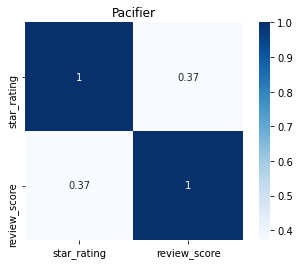

In [257]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
Pcf_heat = sns.heatmap(Pcf_df_by_month.corr(method='pearson'), annot=True, vmax=1, square=True, cmap="Blues")
ax.set_title('Pacifier')
ax.set_xlabel('')
ax.set_ylabel('')

Pcf_heatmap = Pcf_heat.get_figure()
Pcf_heatmap.savefig('./Image/Pcf_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')

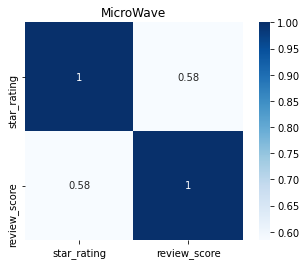

In [258]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
Mcw_heat = sns.heatmap(Mcw_df_by_month.corr(method='pearson'), annot=True, vmax=1, square=True, cmap="Blues")
ax.set_title('MicroWave')
ax.set_xlabel('')
ax.set_ylabel('')

Mcw_heatmap = Mcw_heat.get_figure()
Mcw_heatmap.savefig('./Image/Mcw_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')

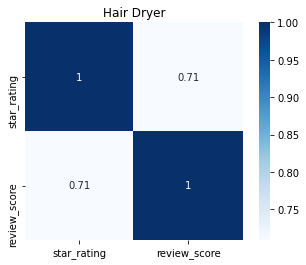

In [259]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
Hdr_heat = sns.heatmap(Hdr_df_by_month.corr(method='pearson'), annot=True, vmax=1, square=True, cmap="Blues")
ax.set_title('Hair Dryer')
ax.set_xlabel('')
ax.set_ylabel('')

Hdr_heatmap = Hdr_heat.get_figure()
Hdr_heatmap.savefig('./Image/Hdr_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')

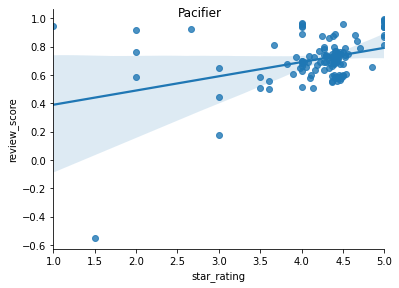

In [275]:
Pcf_ax = sns.pairplot(Pcf_df_by_month, x_vars='star_rating', y_vars='review_score', height=4, aspect=1.4, kind='reg')
Pcf_ax.fig.suptitle("Pacifier")
Pcf_ax.savefig('./Image/Pcf_e.png', dpi=300, bbox_inches='tight', facecolor='white')

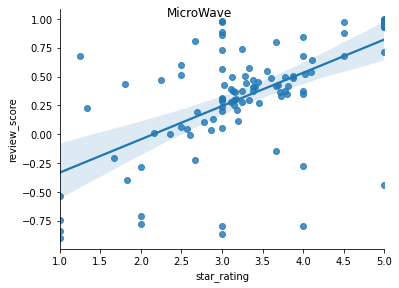

In [268]:
Mcw_ax = sns.pairplot(Mcw_df_by_month, x_vars='star_rating', y_vars='review_score', height=4, aspect=1.4, kind='reg')
Mcw_ax.fig.suptitle("MicroWave")
Mcw_ax.savefig('./Image/Mcw_e.png', dpi=300, bbox_inches='tight', facecolor='white')

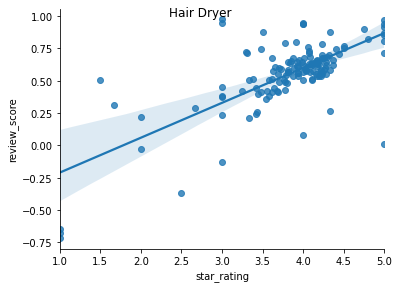

In [269]:
Hdr_ax = sns.pairplot(Hdr_df_by_month, x_vars='star_rating', y_vars='review_score', height=4, aspect=1.4, kind='reg')
Hdr_ax.fig.suptitle("Hair Dryer")
Hdr_ax.savefig('./Image/Hdr_e.png', dpi=300, bbox_inches='tight', facecolor='white')